<a href="https://colab.research.google.com/github/CourseMate-Capstone-Project/ML/blob/main/notebooks/CourseMate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ipywidgets import interact
import ipywidgets as widgets
import scipy.stats as stats

In [2]:
dataset = 'https://raw.githubusercontent.com/CourseMate-Capstone-Project/ML/refs/heads/main/datasets/Online_Courses.csv'

In [3]:
course = pd.DataFrame(pd.read_csv(dataset))

In [4]:
course.tail()

,Unnamed: 0,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,...,Course Short Intro,Weekly study,Premium course,What's include,Rank,Created by,Program,Number of ratings,Price,COURSE CATEGORIES
8087,143,Certified Scrum Master,https://www.simplilearn.com/certified-scrum-ma...,This Certified ScrumMaster® (CSM) certificatio...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,369,NaN,Agile and Scrum
8088,144,Salesforce Basics Course for Beginners,https://www.simplilearn.com/salesforce-course?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,348,NaN,Big Data
8089,145,ICP-ACC (ICAgile Certified Agile Coaching) Cer...,https://www.simplilearn.com/certified-agile-co...,This ICP-ACC Certification Training Course aim...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,301,NaN,Agile and Scrum
8090,146,/irisprodflip456,https://www.simplilearn.com/irisprodflip456?tag=,Iris Production check 456,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,293,NaN,Big Data Analytics
8091,147,Introduction to Industry 4.0,https://www.simplilearn.com/introduction-indus...,Introduction to Industry 4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,240,NaN,Business and Leadership


In [5]:
course.shape

(8092, 45)

In [6]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8092 non-null   int64  
 1   Title                  8092 non-null   object 
 2   URL                    8092 non-null   object 
 3   Short Intro            8040 non-null   object 
 4   Category               2819 non-null   object 
 5   Sub-Category           2819 non-null   object 
 6   Course Type            2819 non-null   object 
 7   Language               2819 non-null   object 
 8   Subtitle Languages     2802 non-null   object 
 9   Skills                 2099 non-null   object 
 10  Instructors            2808 non-null   object 
 11  Rating                 2742 non-null   object 
 12  Number of viewers      2695 non-null   object 
 13  Duration               7944 non-null   object 
 14  Site                   8092 non-null   object 
 15  Prog

In [7]:
course.describe()

,Unnamed: 0,Unique Projects,Price
count,8092.00000,0.0,65.000000
mean,1946.04214,NaN,903.830769
std,1346.92197,NaN,665.949617
min,0.00000,NaN,129.000000
25%,796.00000,NaN,534.000000
50%,1807.50000,NaN,855.000000
75%,2819.25000,NaN,1099.000000
max,4842.00000,NaN,4600.000000


In [8]:
course.isna().sum()

,0
Unnamed: 0,0
Title,0
URL,0
Short Intro,52
Category,5273
Sub-Category,5273
Course Type,5273
Language,5273
Subtitle Languages,5290
Skills,5993


<Axes: >

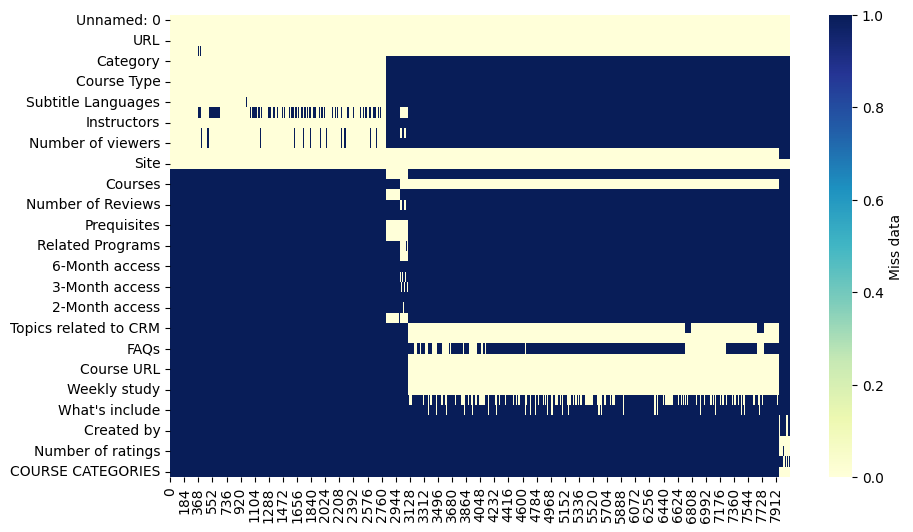

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(course.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Miss data'})

In [10]:
print("Jumlah duplikasi: ", course.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
course.head(), course.isnull().sum()

(   Unnamed: 0                                              Title  \
 0           0                    Machine Learning Specialization   
 1           1        Introduction to Data Science Specialization   
 2           2  Data Science Fundamentals with Python and SQL ...   
 3           3       Key Technologies for Business Specialization   
 4           4                       Deep Learning Specialization   
 
                                                  URL  \
 0  https://www.coursera.org/specializations/machi...   
 1  https://www.coursera.org/specializations/intro...   
 2  https://www.coursera.org/specializations/data-...   
 3  https://www.coursera.org/specializations/key-t...   
 4  https://www.coursera.org/specializations/deep-...   
 
                                          Short Intro      Category  \
 0  #BreakIntoAI with Machine Learning Specializat...  Data Science   
 1  Launch your career in data science. Gain found...  Data Science   
 2  Build the Foundation fo

In [12]:
# Columns to check for non-null values
required_columns = ["Title", "URL", "Short Intro", "Category", "Sub-Category", "Course Type", "Language", "Duration", "Site"]

# Hapus semua kolom kecuali yang ada dalam required_columns
filtered_courses = course[required_columns].dropna()

# Cek hasilnya
print(filtered_courses.info())  # Untuk melihat struktur data
print(filtered_courses.head())


<class 'pandas.core.frame.DataFrame'>
Index: 2775 entries, 0 to 2818
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2775 non-null   object
 1   URL           2775 non-null   object
 2   Short Intro   2775 non-null   object
 3   Category      2775 non-null   object
 4   Sub-Category  2775 non-null   object
 5   Course Type   2775 non-null   object
 6   Language      2775 non-null   object
 7   Duration      2775 non-null   object
 8   Site          2775 non-null   object
dtypes: object(9)
memory usage: 216.8+ KB
None
                                               Title  \
0                    Machine Learning Specialization   
1        Introduction to Data Science Specialization   
2  Data Science Fundamentals with Python and SQL ...   
3       Key Technologies for Business Specialization   
4                       Deep Learning Specialization   

                                                 URL 

In [13]:
# Load the dataset yang sudah difilter sebelumnya (dengan 2775 rows)
course_data = filtered_courses.copy()

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
    return text

# Ekstrak angka dari kolom 'Duration' dan konversi ke tipe numerik
course_data["Duration"] = course_data["Duration"].str.extract('(\d+)', expand=False)
course_data["Duration"] = pd.to_numeric(course_data["Duration"], errors='coerce')

# Gantilah nilai NaN dengan nilai default, misalnya 1
course_data["Duration"] = course_data["Duration"].fillna(1)

# Pastikan kolom 'Duration' adalah bilangan bulat
course_data["Duration"] = course_data["Duration"].astype(int)

# Standarkan durasi kursus
scaler = StandardScaler()
course_data['Duration-Scaled'] = scaler.fit_transform(course_data[['Duration']])

# Cek hasilnya
print(course_data[['Duration', 'Duration-Scaled']].head())


   Duration  Duration-Scaled
0         3        -1.063504
1         5        -0.870291
2         7        -0.677079
3         3        -1.063504
4         5        -0.870291


In [14]:
# Cek apakah ada nilai NaN atau inf pada dataset
print(course_data.isna().sum())  # Cek NaN
print((course_data == float('inf')).sum())  # Cek inf


Title              0
URL                0
Short Intro        0
Category           0
Sub-Category       0
Course Type        0
Language           0
Duration           0
Site               0
Duration-Scaled    0
dtype: int64
Title              0
URL                0
Short Intro        0
Category           0
Sub-Category       0
Course Type        0
Language           0
Duration           0
Site               0
Duration-Scaled    0
dtype: int64


In [15]:
# Menyimpan dataset yang sudah dibersihkan ke file CSV
course_data.to_csv('cleaned_courses.csv', index=False)

# Verifikasi apakah file telah tersimpan dengan benar
print("Dataset telah disimpan sebagai 'cleaned_courses.csv'")

Dataset telah disimpan sebagai 'cleaned_courses.csv'


In [16]:
# Memuat dataset yang sudah disimpan
loaded_courses = pd.read_csv('cleaned_courses.csv')

# Tampilkan informasi tentang dataset dan beberapa baris pertama
print(loaded_courses.info())
print(loaded_courses.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            2775 non-null   object 
 1   URL              2775 non-null   object 
 2   Short Intro      2775 non-null   object 
 3   Category         2775 non-null   object 
 4   Sub-Category     2775 non-null   object 
 5   Course Type      2775 non-null   object 
 6   Language         2775 non-null   object 
 7   Duration         2775 non-null   int64  
 8   Site             2775 non-null   object 
 9   Duration-Scaled  2775 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 216.9+ KB
None
                                               Title  \
0                    Machine Learning Specialization   
1        Introduction to Data Science Specialization   
2  Data Science Fundamentals with Python and SQL ...   
3       Key Technologies for Business Specializa

In [17]:
# Melihat semua kategori unik yang ada di dataset
unique_categories = course_data['Category'].unique()
print("Kategori yang tersedia dalam dataset:")
print(unique_categories)


Kategori yang tersedia dalam dataset:
['Data Science' 'Business' 'Information Technology' 'Computer Science'
 'Arts and Humanities' 'Language Learning' 'Personal Development'
 'Social Sciences' 'Health' 'Physical Science and Engineering'
 'Math and Logic' '计算机科学' 'Ciencia de Datos' 'Negocios'
 'Ciencias de la Computación' 'Negócios' 'データサイエンス']


In [18]:
# Melihat semua sub-kategori unik yang ada di dataset
unique_subcategories = course_data['Sub-Category'].unique()
print("Sub-kategori yang tersedia dalam dataset:")
print(unique_subcategories)


Sub-kategori yang tersedia dalam dataset:
['Machine Learning' 'Data Analysis' 'Business Essentials'
 'Data Management' 'Security' 'Software Development' 'Cloud Computing'
 'Mobile and Web Development' 'Algorithms' 'Finance'
 'Leadership and Management' 'Design and Product' 'Music and Art'
 'Learning English' 'Entrepreneurship' 'Marketing' 'Business Strategy'
 'Personal Development' 'Governance and Society' 'Healthcare Management'
 'Networking' 'Education' 'Computer Security and Networks' 'Nutrition'
 'Public Health' 'Probability and Statistics' 'Electrical Engineering'
 'Basic Science' 'Patient Care' 'Health Informatics' 'Philosophy'
 'Environmental Science and Sustainability' 'Math and Logic'
 'Other Languages' 'Physics and Astronomy' 'Law' 'Biology'
 'Mechanical Engineering' 'Support and Operations' '移动和网络开发'
 'Análisis de Datos' 'Liderazgo y Gestión' 'Diseño y Producto' 'データ分析'
 'Research' 'Psychology' 'Economics' 'Research Methods' 'Chemistry'
 'History' 'Animal Health']


In [19]:
# Kategori dan Sub-Kategori yang akan dipertahankan
selected_categories = ['Data Science', 'Business', 'Information Technology', 'Computer Science', 'Arts and Humanities', 'Personal Development', 'Health', 'Physical Science and Engineering']
selected_subcategories = ['Machine Learning', 'Data Analysis', 'Business Essentials', 'Data Management', 'Security', 'Software Development', 'Cloud Computing', 'Mobile and Web Development', 'Algorithms', 'Finance', 'Leadership and Management', 'Design and Product', 'Music and Art', 'Learning English', 'Entrepreneurship', 'Marketing', 'Business Strategy', 'Personal Development', 'Governance and Society', 'Healthcare Management', 'Networking', 'Education', 'Computer Security and Networks', 'Nutrition', 'Public Health', 'Probability and Statistics', 'Electrical Engineering', 'Basic Science', 'Patient Care', 'Health Informatics', 'Philosophy', 'Environmental Science and Sustainability', 'Math and Logic', 'Other Languages', 'Physics and Astronomy', 'Law', 'Biology', 'Mechanical Engineering', 'Support and Operations', 'Research', 'Psychology', 'Economics', 'Research Methods', 'Chemistry', 'History', 'Animal Health']

# Filter dataset
filtered_category = course_data[course_data['Category'].isin(selected_categories)]
filtered_subcategory = filtered_category[filtered_category['Sub-Category'].isin(selected_subcategories)]

# Hasil jumlah data
print(filtered_category['Category'].value_counts())
print(filtered_subcategory['Sub-Category'].value_counts())


Category
Business                            883
Computer Science                    449
Data Science                        436
Health                              260
Information Technology              215
Physical Science and Engineering    147
Arts and Humanities                 120
Personal Development                 68
Name: count, dtype: int64
Sub-Category
Leadership and Management                   252
Data Analysis                               243
Software Development                        225
Business Essentials                         209
Machine Learning                            160
Finance                                     152
Marketing                                   128
Business Strategy                           115
Cloud Computing                             107
Music and Art                               106
Design and Product                           76
Personal Development                         68
Algorithms                                   67
Mobile a

In [20]:
print("Jumlah baris filtered_category:", len(filtered_category))
print("Jumlah baris filtered_subcategory:", len(filtered_subcategory))


Jumlah baris filtered_category: 2578
Jumlah baris filtered_subcategory: 2578


In [21]:
# Menampilkan semua isi tanpa terpotong
pd.set_option('display.max_colwidth', None)

# Menampilkan sub-category unik untuk setiap kategori yang dipilih
sub_category_per_category = filtered_category.groupby('Category')['Sub-Category'].unique()
print(sub_category_per_category)

# Kembalikan pengaturan tampilan (opsional, jika ingin menghindari efek pada output lain)
pd.reset_option('display.max_colwidth')


Category
Arts and Humanities                                                                                                                             [Music and Art, Philosophy, History]
Business                                                                   [Business Essentials, Finance, Leadership and Management, Entrepreneurship, Marketing, Business Strategy]
Computer Science                                                  [Software Development, Mobile and Web Development, Algorithms, Design and Product, Computer Security and Networks]
Data Science                                                                                                           [Machine Learning, Data Analysis, Probability and Statistics]
Health                              [Healthcare Management, Nutrition, Public Health, Basic Science, Patient Care, Health Informatics, Biology, Research, Psychology, Animal Health]
Information Technology                                                                

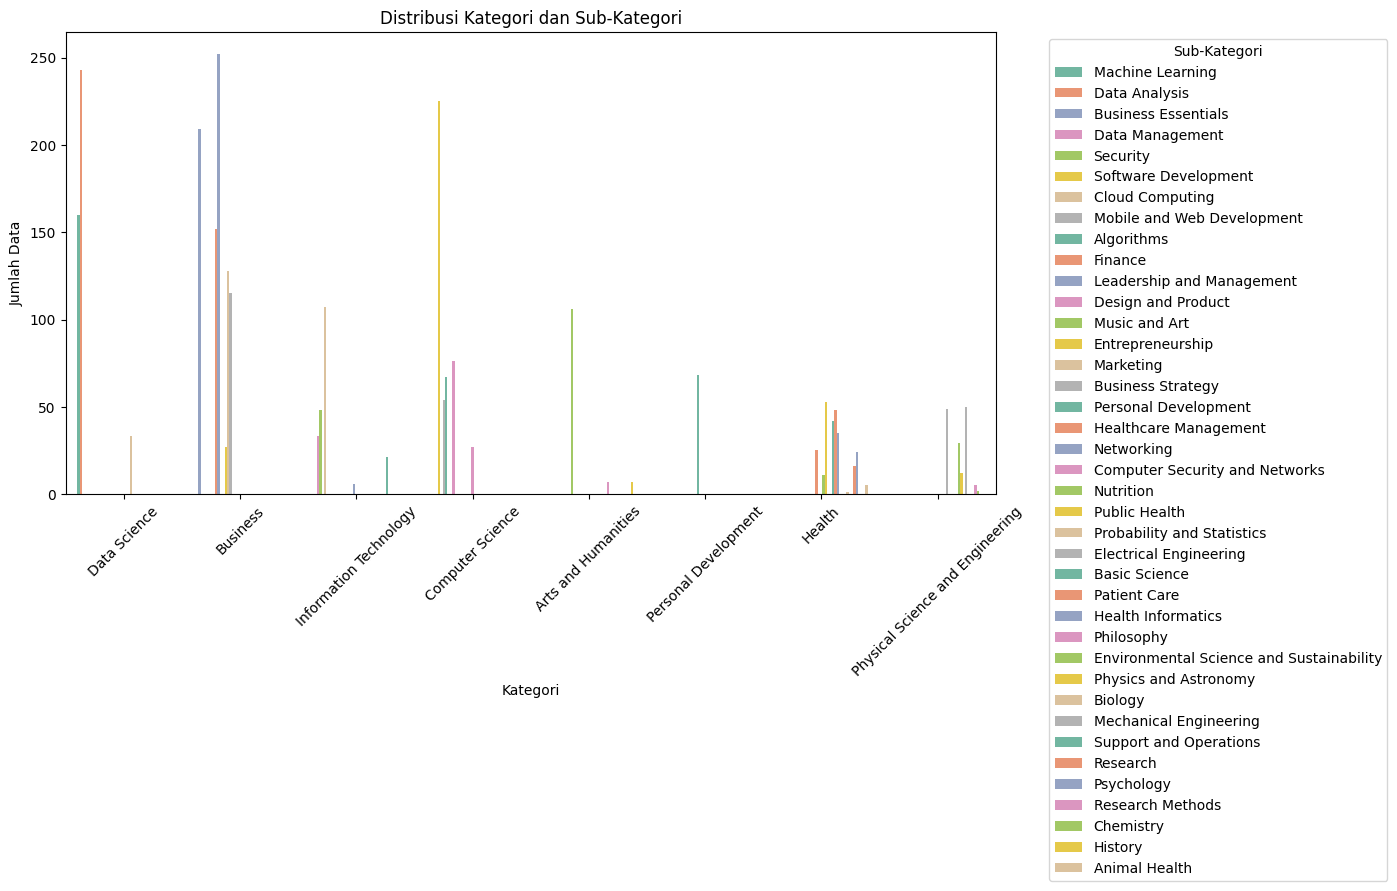

In [22]:
# Filter dataset berdasarkan kategori dan subkategori yang dipilih
filtered_courses = course_data[course_data['Category'].isin(selected_categories) &
                               course_data['Sub-Category'].isin(selected_subcategories)]

# Visualisasi hubungan antara Kategori dan Sub-Kategori
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_courses, x='Category', hue='Sub-Category', palette='Set2')
plt.title('Distribusi Kategori dan Sub-Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.legend(title='Sub-Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


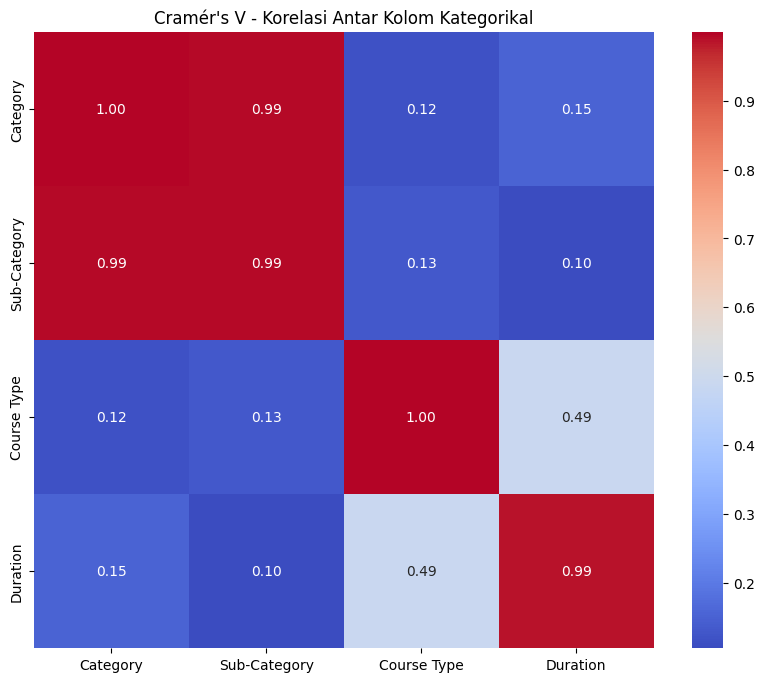

In [23]:
# Fungsi untuk menghitung Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()

    if n == 0 or contingency_table.shape[0] == 1 or contingency_table.shape[1] == 1:
        return 0.0

    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    c = np.sqrt(phi2corr / min((k - 1), (r - 1)))
    return c

# Pilih kolom kategorikal untuk analisis
categorical_columns = ["Category", "Sub-Category", "Course Type", "Duration"]

# Hitung Cramér's V untuk setiap pasangan kolom kategorikal
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(filtered_courses[col1], filtered_courses[col2])

# Konversi nilai ke tipe float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Visualisasikan hasil korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Cramér's V - Korelasi Antar Kolom Kategorikal")
plt.show()


In [24]:
# Fungsi rekomendasi berbasis kategori
def recommend_courses(user_category, data, top_n=5):
    # Filter data berdasarkan kategori yang dipilih
    category_filtered = data[data['Category'].str.lower() == user_category.lower()].copy()

    return category_filtered[["Title", "URL", "Short Intro", "Sub-Category", "Course Type", "Language", "Duration", "Site"]]

In [25]:
# Membuat widget input kategori
category_widget = widgets.Dropdown(
    options=selected_categories,
    description='Category:',
    disabled=False
)

# Fungsi untuk menampilkan hasil rekomendasi
def show_recommendations(user_category):
    # Mengambil data rekomendasi berdasarkan kategori
    recommended_courses = recommend_courses(user_category, course_data)

    # Menampilkan hanya 10 rekomendasi pertama
    recommended_courses = recommended_courses.head(10)

    # Menampilkan hasil
    print(f"Recommended Courses for Category: {user_category}\n")
    for idx, row in recommended_courses.iterrows():
        print(f"Title: {row['Title']}")
        print(f"Intro: {row['Short Intro']}")
        print(f"URL: {row['URL']}")
        print(f"Sub-Category: {row['Sub-Category']}")
        print(f"Course Type: {row['Course Type']}")
        print(f"Language: {row['Language']}")
        print(f"Duration: {row['Duration']} month(s)")
        print(f"Site: {row['Site']}")
        print("=" * 20)

# Menampilkan form input interaktif
widgets.interactive(show_recommendations,
                    user_category=category_widget)

interactive(children=(Dropdown(description='Category:', options=('Data Science', 'Business', 'Information Tech…

In [26]:
# Encode Kolom-Kolom yang Diperlukan
label_encoder_subcategory = LabelEncoder()
label_encoder_category = LabelEncoder()
label_encoder_course_type = LabelEncoder()

# Membuat salinan dari filtered_courses untuk menghindari SettingWithCopyWarning
filtered_courses = filtered_courses.copy()

# Encode 'Sub-Category', 'Category', dan 'Course Type' dengan menggunakan .loc
filtered_courses.loc[:, 'Sub-Category-Encoded'] = label_encoder_subcategory.fit_transform(filtered_courses['Sub-Category'])
filtered_courses.loc[:, 'Category-Encoded'] = label_encoder_category.fit_transform(filtered_courses['Category'])
filtered_courses.loc[:, 'Course-Type-Encoded'] = label_encoder_course_type.fit_transform(filtered_courses['Course Type'])

# Standarkan durasi kursus
scaler = StandardScaler()
filtered_courses['Duration-Scaled'] = scaler.fit_transform(filtered_courses[['Duration']])

# Fitur dan label
X = filtered_courses[['Sub-Category-Encoded', 'Course-Type-Encoded', 'Duration-Scaled']]
y = filtered_courses['Category-Encoded']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Membuat model TensorFlow
model = models.Sequential()

# Layer input dengan 3 fitur (Sub-Category-Encoded, Course-Type-Encoded, Duration-Scaled)
model.add(layers.Input(shape=(X_train.shape[1],)))  # X_train.shape[1] = 3

# Layer hidden pertama dengan lebih banyak neuron
model.add(layers.Dense(256, activation='relu'))

# Layer hidden kedua
model.add(layers.Dense(128, activation='relu'))

# Layer hidden ketiga
model.add(layers.Dense(64, activation='relu'))

# Layer hidden keeempat
model.add(layers.Dense(32, activation='relu'))

# Layer hidden kelima
model.add(layers.Dense(16, activation='relu'))

# Output layer sesuai jumlah kategori
model.add(layers.Dense(len(filtered_courses['Category'].unique()), activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tampilkan arsitektur model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,920 (175.47 KB)

 Trainable params: 44,920 (175.47 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Latih model
history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=8,
    validation_data=(X_test, y_test)
)

Epoch 1/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3196 - loss: 1.9710 - val_accuracy: 0.4147 - val_loss: 1.6666
Epoch 2/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4041 - loss: 1.6763 - val_accuracy: 0.4864 - val_loss: 1.4439
Epoch 3/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4674 - loss: 1.4707 - val_accuracy: 0.6105 - val_loss: 1.1871
Epoch 4/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5839 - loss: 1.2569 - val_accuracy: 0.6415 - val_loss: 1.0425
Epoch 5/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6126 - loss: 1.1008 - val_accuracy: 0.6531 - val_loss: 0.9269
Epoch 6/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6482 - loss: 0.9984 - val_accuracy: 0.6880 - val_loss: 0.9271
Epoch 7/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6673 - loss: 0.9396 - val_accuracy: 0.6802 - val_loss: 0.8887
Epoch 8/80
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6708 - loss: 0.9396 - val_accuracy: 0.

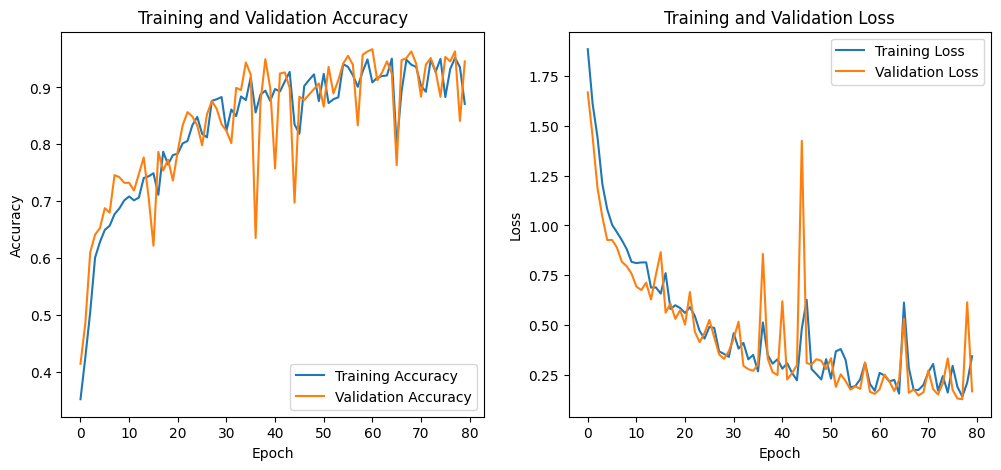

In [29]:
# Plot akurasi dan loss
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [30]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)

# Menampilkan akurasi dalam bentuk persen
print(f'Model Accuracy: {accuracy * 100:.1f}%')


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.1604 
Model Accuracy: 94.6%


In [31]:
# Prediksi kategori untuk data pengujian
y_pred = model.predict(X_test)

# Ambil kategori yang diprediksi (kelas dengan probabilitas tertinggi)
predicted_classes = y_pred.argmax(axis=-1)

# Konversi hasil prediksi kembali ke nama kategori
predicted_category_names = label_encoder_category.inverse_transform(predicted_classes)

# Tampilkan beberapa hasil prediksi
test_results = pd.DataFrame({
    'Actual Category': label_encoder_category.inverse_transform(y_test),
    'Predicted Category': predicted_category_names,
    'Predicted Probability': y_pred.max(axis=-1)
})

# Tampilkan hasil prediksi
print(test_results)

# Hitung rata-rata probabilitas
average_probability = test_results['Predicted Probability'].mean()

# Tampilkan rata-rata probabilitas
print(f"\nRata-rata Probabilitas Prediksi: {average_probability:.2f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
                      Actual Category                Predicted Category  \
0                            Business                          Business   
1                 Arts and Humanities               Arts and Humanities   
2              Information Technology            Information Technology   
3                            Business                          Business   
4    Physical Science and Engineering  Physical Science and Engineering   
..                                ...                               ...   
511                  Computer Science                  Computer Science   
512                      Data Science                      Data Science   
513                            Health                            Health   
514                          Business                          Business   
515  Physical Science and Engineering  Physical Science and Engineering   

     Predicted Probability  
0                 1.000000  
1 

In [32]:
predicted_class = predicted_classes > 0.8
print(predicted_class)

[ True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [41]:
# Input pengguna
user_input_subcategory = 'Machine Learning'
user_input_course_type = 'Course'
user_input_duration = 3

# Encode input pengguna
subcategory_encoded = label_encoder_subcategory.transform([user_input_subcategory])[0]
course_type_encoded = label_encoder_course_type.transform([user_input_course_type])[0]
duration_scaled = scaler.fit_transform(np.array([[user_input_duration]]))[0, 0]

# Masukkan input ke dalam model
user_features = np.array([[subcategory_encoded, course_type_encoded, duration_scaled]])
predicted_category_encoded = model.predict(user_features).argmax(axis=-1)[0]
predicted_category = label_encoder_category.inverse_transform([predicted_category_encoded])[0]

# Tampilkan hasil prediksi
print(f"Predicted Category: {predicted_category}\n")

# Filter kursus berdasarkan kategori yang diprediksi saja
filtered_courses = course_data[course_data['Category'] == predicted_category]

# Ambil top-N kursus berdasarkan sub-kategori yang diinput oleh pengguna
top_n = 10
top_courses = course_data[course_data['Sub-Category'] == user_input_subcategory].sort_values(by='Duration').head(top_n)

# Tampilkan hasil
print(f"Recommended Courses for {predicted_category} :\n")

for index, course in top_courses.iterrows():
    title = course['Title']
    short_intro = course['Short Intro']
    url = course['URL']

    # Batasi panjang short intro
    if len(short_intro) > 150:
        short_intro = short_intro[:150] + "..."

    print(f"Title: {title}")
    print(f"Short Intro: {short_intro}")
    print(f"URL: {url}")
    print("\n" + "-"*50 + "\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Category: Data Science

Recommended Courses for Data Science :

Title: Machine Learning Specialization
Short Intro: #BreakIntoAI with Machine Learning Specialization. Master fundamental AI concepts and develop practical machine learning skills in the beginner-friend...
URL: https://www.coursera.org/specializations/machine-learning-introduction

--------------------------------------------------

Title: Machine Learning for Trading Specialization
Short Intro: Start Your Career in Machine Learning for Trading. Learn the machine learning techniques used in quantitative trading.
URL: https://www.coursera.org/specializations/machine-learning-trading

--------------------------------------------------

Title: Practical Data Science on the AWS Cloud Specialization
Short Intro: Become a cloud data science expert. Develop and scale your data science projects into the cloud using Amazon SageMaker
URL: https://www.coursera.org/specializations/practi

In [44]:
# Simpan model setelah pelatihan selesai
model.save("course_recommendation_model.keras")

# Load model TensorFlow yang telah disimpan
model = tf.keras.models.load_model('course_recommendation_model.keras')

# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('course_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("\nModel berhasil dikonversi ke TFLite dan disimpan sebagai 'course_recommendation_model.tflite'")


Saved artifact at '/tmp/tmp09jyvewy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  133716182937520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716181854944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716012639760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002423200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002429888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002432528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002438160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002934976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002943776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002940608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716002945360: TensorSp

In [42]:
# Load model TFLite
interpreter = tf.lite.Interpreter(model_path='course_recommendation_model.tflite')
interpreter.allocate_tensors()

# Dapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Input pengguna
tflite_input_subcategory = 'Data Analysis'
tflite_input_coursetype = 'Specialization'
tflite_input_duration = 1

# Encoding kategori (pastikan label_encoder_subcategory dan label_encoder_course_type sudah ada)
tflite_subcategory_encoded = label_encoder_subcategory.transform([tflite_input_subcategory])[0]
tflite_coursetype_encoded = label_encoder_course_type.transform([tflite_input_coursetype])[0]

# Scaling durasi
tflite_duration_scaled = scaler.transform(np.array([[tflite_input_duration]]))[0, 0]

# Siapkan fitur input untuk model TFLite
tflite_features = np.array([[tflite_subcategory_encoded, tflite_coursetype_encoded, tflite_duration_scaled]], dtype=np.float32)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], tflite_features)

# Jalankan inferensi
interpreter.invoke()

# Ambil hasil output
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_category = np.argmax(output_data)

# Tampilkan hasil prediksi
print(f"Predicted Category Index: {predicted_category}")

# Dekode indeks prediksi kembali menjadi nama kategori
category_name = label_encoder_category.inverse_transform([predicted_category])[0]
print(f"Predicted Category: {category_name}")


Predicted Category Index: 3
Predicted Category: Data Science


In [43]:
# Filter kursus berdasarkan kategori yang diprediksi
recommended_courses = filtered_courses[filtered_courses['Category'] == category_name]

# Urutkan kursus berdasarkan durasi (dari yang paling cepat ke yang paling lama)
recommended_courses_sorted = recommended_courses.sort_values(by='Duration').head(10)

print(f"Recommended Courses for Category: {category_name}\n")

# Tampilkan kursus dengan durasi paling cepat
for index, course in recommended_courses_sorted.iterrows():
    print(f"Title: {course['Title']}")
    print(f"Short Intro: {course['Short Intro'][:150]}...")
    print(f"URL: {course['URL']}")
    print("-" * 50)


Recommended Courses for Category: Data Science

Title: Assessment for Data Analysis and Visualization Foundations
Short Intro: This is the final course in the Data Analysis and Visualization Foundations Specialization. It contains a graded final examination covering content fr...
URL: https://www.coursera.org/learn/data-analysis-visualization-foundations-assessment?specialization=data-analysis-visualization-foundations
--------------------------------------------------
Title: Connect an App to a Cloud SQL for PostgreSQL Instance
Short Intro: Kubernetes...
URL: https://www.coursera.org/learn/googlecloud-connect-an-app-to-a-cloud-sql-for-postgresql-instance-mhiqu?specialization=google-cloud-database-engineer
--------------------------------------------------
Title: Curso Completo de Power BI Desktop
Short Intro: Conocer el funcionamiento de Power BI Desktop...
URL: https://www.coursera.org/projects/curso-completo-power-bi
--------------------------------------------------
Title: SAS Visu